# Contour detection and filtering

In [73]:
import cv2 as cv

In [76]:
def setLabel(image, str, contour):
    (text_width, text_height), baseline = cv.getTextSize(str, cv.FONT_HERSHEY_SIMPLEX, 0.7, 1)
    x,y,width,height = cv.boundingRect(contour)
    pt_x = x+int((width-text_width)/2)
    pt_y = y+int((height + text_height)/2)
    cv.rectangle(image, (pt_x, pt_y+baseline), (pt_x+text_width, pt_y-text_height), (200,200,200), cv.FILLED)
    cv.putText(image, str, (pt_x, pt_y), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0), 1, 8)


img_color = cv.imread('coins1.png', cv.IMREAD_COLOR)
cv.imshow('result', img_color)
cv.waitKey(0)

img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
cv.imshow('result', img_gray)
cv.waitKey(0)

ret,img_binary = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY_INV|cv.THRESH_OTSU)
cv.imshow('result', img_binary)
cv.waitKey(0)

contours, hierarchy = cv.findContours(img_binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [83]:
for cnt in contours:
    size = len(cnt)
    print(size)

    epsilon = 0.005 * cv.arcLength(cnt, True)
    approx = cv.approxPolyDP(cnt, epsilon, True)

    size = len(approx)
    print(size)

    cv.line(img_color, tuple(approx[0][0]), tuple(approx[size-1][0]), (0, 255, 0), 3)
    for k in range(size-1):
        cv.line(img_color, tuple(approx[k][0]), tuple(approx[k+1][0]), (0, 255, 0), 3)
    if cv.isContourConvex(approx):
        if size == 3:
            setLabel(img_color, "triangle", cnt)
        elif size == 4:
            setLabel(img_color, "rectangle", cnt)
        elif size == 5:
            setLabel(img_color, "pentagon", cnt)
        elif size == 6:
            setLabel(img_color, "hexagon", cnt)
        elif size == 8:
            setLabel(img_color, "octagon", cnt)
        elif size == 10:
            setLabel(img_color, "decagon", cnt)
        else:
            setLabel(img_color, str(size), cnt)
    else:
        setLabel(img_color, str(size), cnt)

cv.imshow('result', img_color)
cv.waitKey(0)

114
17
2
2
2
2
2
2
273
22
2
2
191
22


-1

In [77]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [78]:
blur = cv2.GaussianBlur(img,(5,5),0)
cv2.imshow('dst',blur)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<ipython-input-87-47aafa8d9266>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122),plt.imshow(dst),plt.title('Gray Image')


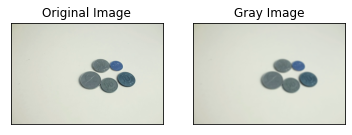

In [87]:
img = cv2.imread('coins1.png')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Gaussian Image')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dst),plt.title('Gray Image')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()
